# Text Mining of Echo Dot (3rd Gen) - Smart speaker with Alexa (Black)
##source:- Amazon

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# creating empty review list
EchoDot_3rd_reviews=[]

for i in range(1,20):
  Echodot=[]

url='https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
response=requests.get(url)
soup=bs(response.content,"html.parser")

reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
  Echodot.append(reviews[i].text)
  EchoDot_3rd_reviews=EchoDot_3rd_reviews+Echodot

# writing reviews in text file
with open('EchoDot.txt',"w",encoding='utf8') as output:
  output.write(str(EchoDot_3rd_reviews))


In [3]:
EchoDot_3rd_reviews

['\nVery good product but LED not ok goloing and blinking\n',
 '\nVery good product but LED not ok goloing and blinking\n',
 '\nAmazing speaker with Alexa\n',
 '\nVery good product but LED not ok goloing and blinking\n',
 '\nAmazing speaker with Alexa\n',
 '\nGood\n',
 '\nVery good product but LED not ok goloing and blinking\n',
 '\nAmazing speaker with Alexa\n',
 '\nGood\n',
 '\nGood.... U can buy....\n',
 '\nVery good product but LED not ok goloing and blinking\n',
 '\nAmazing speaker with Alexa\n',
 '\nGood\n',
 '\nGood.... U can buy....\n',
 '\neveryone take this\n',
 '\nVery good product but LED not ok goloing and blinking\n',
 '\nAmazing speaker with Alexa\n',
 '\nGood\n',
 '\nGood.... U can buy....\n',
 '\neveryone take this\n',
 "\nI recently purchased the Amazon Alexa 3rd Gen smart speaker from Amazon, and I must say it has quickly become an essential part of my daily routine. This device is simply outstanding, and I can't imagine my life without it now.First and foremost, the

 ## Joinining all the reviews into single paragraph

In [4]:
echodot_rev_string = " ".join(EchoDot_3rd_reviews)

## Removing unwanted symbols incase if exists

In [5]:

echodot_rev_string = re.sub("[^A-Za-z" "]+"," ",echodot_rev_string).lower()
echodot_rev_string = re.sub("[0-9" "]+"," ",echodot_rev_string)

## words that contained in EchoDot 3rd Gen reviews

In [6]:

echodot_reviews_words = echodot_rev_string.split(" ")
print(echodot_reviews_words)
# stop_words = stopwords.words('english')

['', 'very', 'good', 'product', 'but', 'led', 'not', 'ok', 'goloing', 'and', 'blinking', 'very', 'good', 'product', 'but', 'led', 'not', 'ok', 'goloing', 'and', 'blinking', 'amazing', 'speaker', 'with', 'alexa', 'very', 'good', 'product', 'but', 'led', 'not', 'ok', 'goloing', 'and', 'blinking', 'amazing', 'speaker', 'with', 'alexa', 'good', 'very', 'good', 'product', 'but', 'led', 'not', 'ok', 'goloing', 'and', 'blinking', 'amazing', 'speaker', 'with', 'alexa', 'good', 'good', 'u', 'can', 'buy', 'very', 'good', 'product', 'but', 'led', 'not', 'ok', 'goloing', 'and', 'blinking', 'amazing', 'speaker', 'with', 'alexa', 'good', 'good', 'u', 'can', 'buy', 'everyone', 'take', 'this', 'very', 'good', 'product', 'but', 'led', 'not', 'ok', 'goloing', 'and', 'blinking', 'amazing', 'speaker', 'with', 'alexa', 'good', 'good', 'u', 'can', 'buy', 'everyone', 'take', 'this', 'i', 'recently', 'purchased', 'the', 'amazon', 'alexa', 'rd', 'gen', 'smart', 'speaker', 'from', 'amazon', 'and', 'i', 'must', 

In [7]:
!pip install spacy
!python -m spacy download en_core_web_md


2023-07-06 12:14:53.177282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 12:14:54.522154: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [8]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=EchoDot_3rd_reviews[20]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [9]:
with open("/content/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

echodot_reviews_words = [w for w in echodot_reviews_words if not w in stopwords]

In [10]:
# Joinining all the reviews into single paragraph
echodot_rev_para = " ".join(echodot_reviews_words)

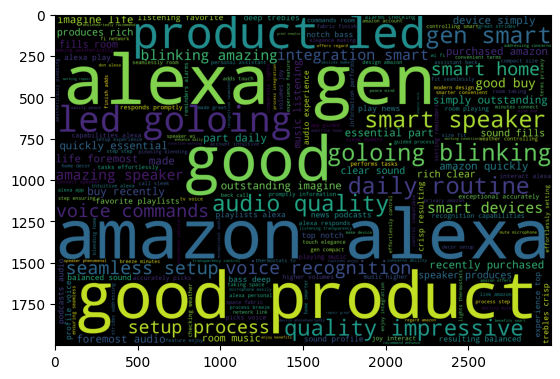

In [11]:
wordcloud_echodot = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(echodot_rev_para)

plt.imshow(wordcloud_echodot)

In [12]:
# positive words # Choose the path for +ve words stored in system
with open("/content/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [13]:
# Choosing the only words which are present in positive words
echodot_pos = " ".join ([w for w in echodot_reviews_words if w in poswords])

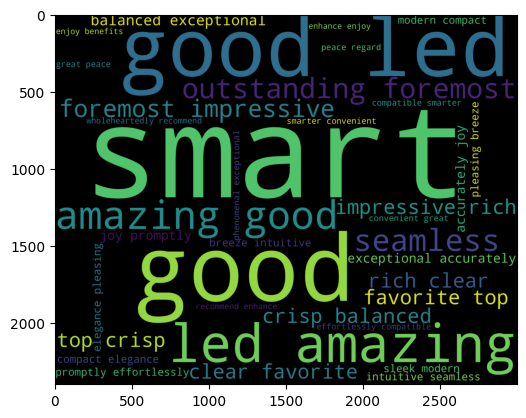

In [14]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(echodot_pos)

plt.imshow(wordcloud_pos)

In [15]:
# negative words
with open("/content/negative-words.txt", "r", encoding='ISO-8859-1') as neg:
    negwords = neg.read().split("\n")


In [16]:
# Choosing the only words which are present in negwords
echodot_neg = " ".join ([w for w in echodot_reviews_words if w in negwords])

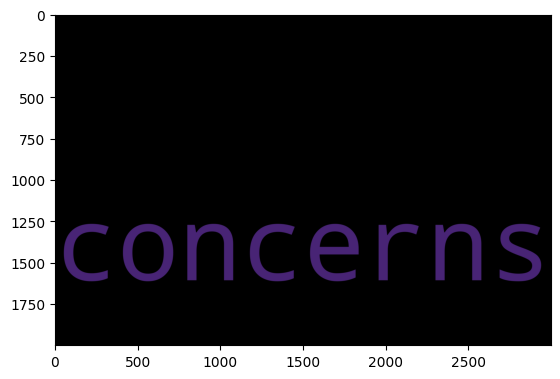

In [17]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(echodot_neg)

plt.imshow(wordcloud_neg)